Programming Assignment 1 Questions 1 and 2

Miles Voenell

Dog Species: Wire-haired fox terrier, Border terrier,Dhole,Pembroke

Discussed Questions with Scott Kalafut


In [1]:
#2A-----------
#	Wire-haired fox terrier,	Border terrier,  	Dhole,  	Pembroke
import xml.etree.ElementTree as ET
import glob
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image 
import os
from pathlib import Path

dog_images = glob.glob('../DataMining/DogImages/*/*')
annotations = glob.glob('../DataMining/Annotation/*/*')

def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall("object")
    bbox = []
    for o in objects:
        bndbox = o.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        bbox.append((xmin,ymin,xmax,ymax))
        return bbox

def get_image(annot):
    img_path = '../DataMining/DogImages'
    file = annot.split('ion')
    img_filename = img_path +file[-1]+'.jpg'
    return img_filename  

for i in range(len(annotations)):
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(annotations[i])
    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((128,128), Image.Resampling.LANCZOS)
        new_path = dog.replace("../DataMining/DogImages","Cropped/")
        new_path = new_path.replace(".jpg","-" + str(j) + ".jpg")
        im2=im2.convert("RGB")
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)




<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

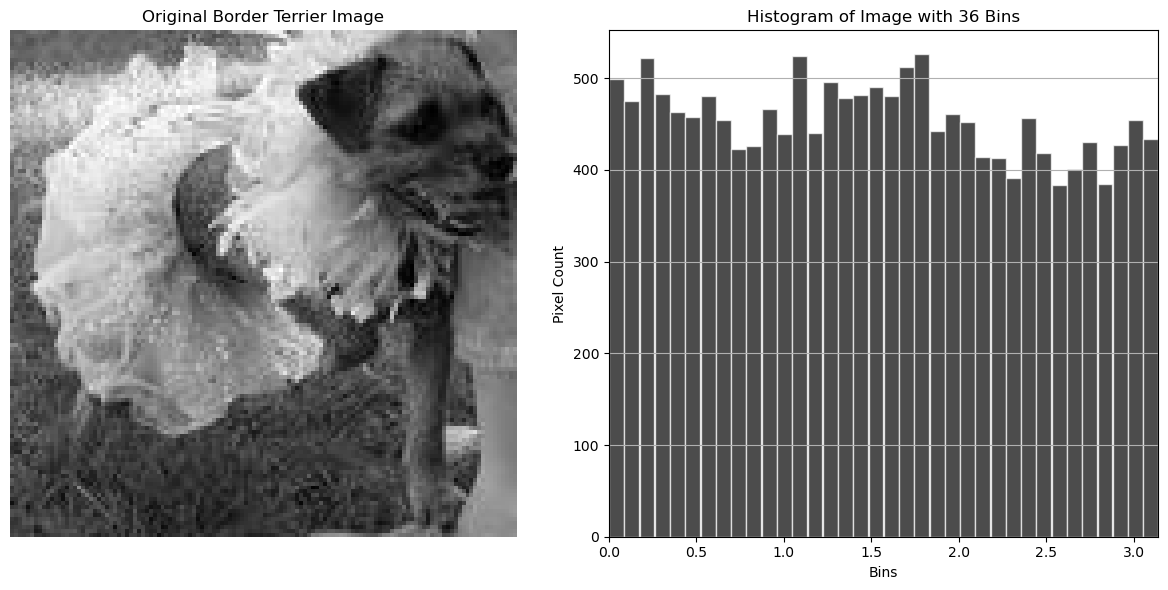

<Figure size 1000x600 with 0 Axes>

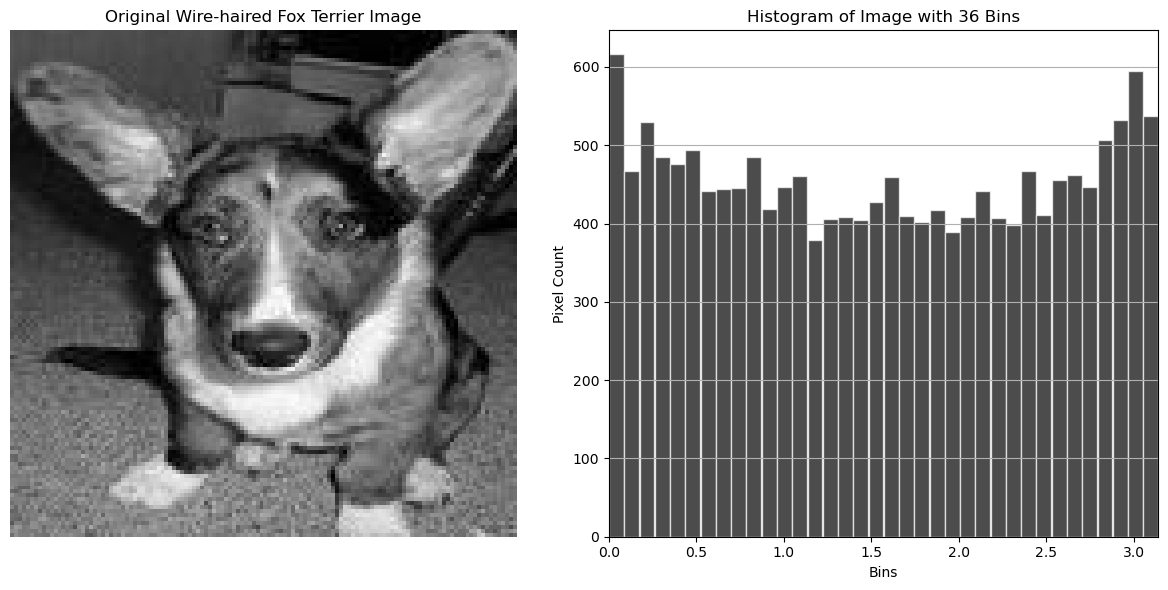

<Figure size 1000x600 with 0 Axes>

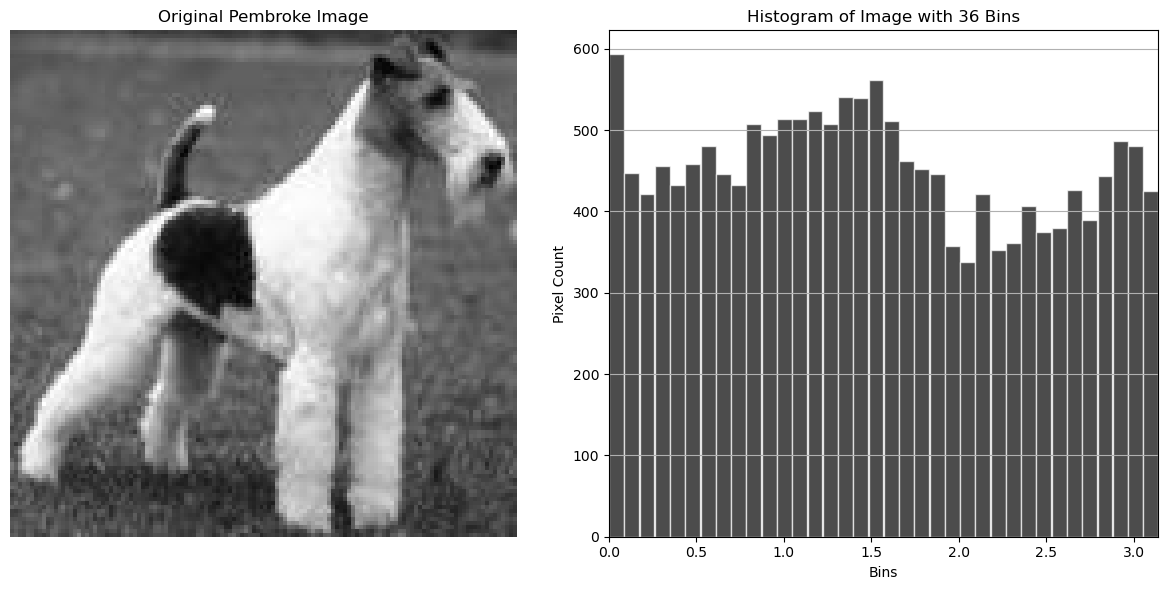

<Figure size 1000x600 with 0 Axes>

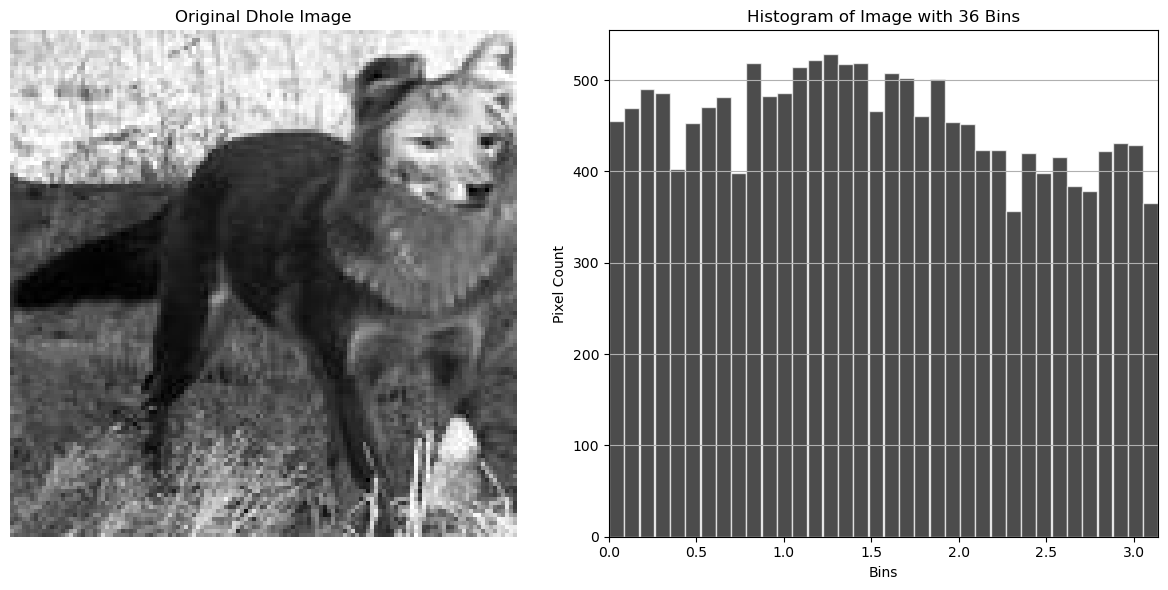

In [34]:
#2B-----------
import numpy as np
from skimage import filters
import glob
from skimage import io,color
import skimage.exposure
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances,manhattan_distances

dog_images = glob.glob('../DataMining/DogImages/*/*')
annotations = glob.glob('../DataMining/Annotation/*/*')

def get_image(annot):
    img_path = '../DataMining/Gray/N02'
    file = annot.split('n02')
    img_filename = img_path + file[-1]+'-grey.jpg'
    return img_filename  

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

dog = get_image(annotations[1])
for i in range(1,5):
    image = io.imread('../DataMining/gray/dog'+str(i)+'-grey.jpg', as_gray=True)
    angle_sobel = angle(filters.sobel_h(image),filters.sobel_v(image))

    image_flat = angle_sobel.flatten()
    hist, bin_centers = skimage.exposure.histogram(image_flat, nbins=36)
    
    plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image, cmap='gray')
    if i == 1:
        ax[0].set_title('Original Border Terrier Image')
        fig1 = hist 
    if i == 2:
        ax[0].set_title('Original Wire-haired Fox Terrier Image')
        fig2 = hist
    if i == 3:
        ax[0].set_title('Original Pembroke Image')
    if i == 4:
        ax[0].set_title('Original Dhole Image')

    ax[0].axis('off')
    ax[1].bar(bin_centers, hist, width=0.085, color='black', edgecolor='white', align='center',alpha=.7) 
    ax[1].set_title('Histogram of Image with 36 Bins')
    ax[1].set_xlabel('Bins')
    ax[1].set_ylabel('Pixel Count')
    ax[1].set_xlim(0,np.pi)  
    ax[1].grid(axis='y')
    plt.tight_layout()
    plt.show()

#dog 1 = border Terrier, dog 2 = wire-haired-fox-terrier, dog 3 = Pembroke, dog 4 = dhole

Question 2B vi.

In [5]:
fig1 = np.array(fig1).reshape(1,-1)
fig2 = np.array(fig2).reshape(1,-1)
euclidean_distance = euclidean_distances(fig1,fig2)
print(f'Euclidean Distance between fig1 and fig2: {euclidean_distance[0][0]}')
manhattan_distance = manhattan_distances(fig1,fig2)
print(f'Manhattan Distance between fig1 and fig2: {manhattan_distance[0][0]}')
cosine_sim = cosine_similarity(fig1, fig2)
print("Cosine Similarity:", cosine_sim[0][0])



Euclidean Distance between fig1 and fig2: 392.34678538252354
Manhattan Distance between fig1 and fig2: 1858.0
Cosine Similarity: 0.9897929823940589


Question 2C


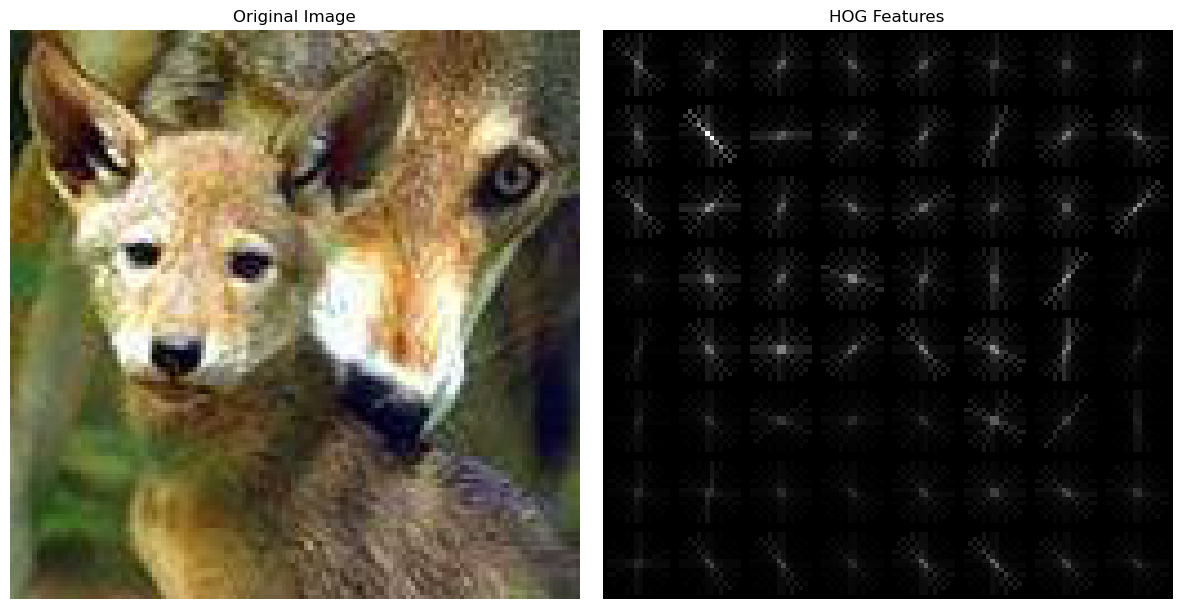

In [119]:
#2C---------------
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import hog
from skimage import exposure

image = io.imread('../DataMining/Cropped/n02115913-dhole/n02115913_5593-0.jpg') 
hog_features, hog_image = hog(image, orientations=12, pixels_per_cell=(16,16), cells_per_block=(2, 2), visualize=True, channel_axis = -1)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range='image')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Features')
plt.axis('off')

plt.tight_layout()
plt.show()

Question 2D

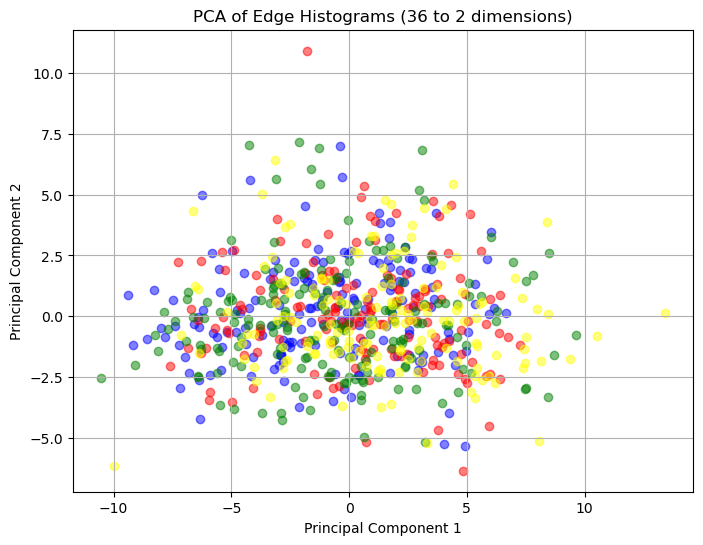

In [121]:
#2D-------------
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
 
def get_image(annot):
    img_path = '../DataMining/Cropped/'
    file = annot.split('ion')
    img_filename = img_path +file[-1]+'-0.jpg'
    return img_filename  

dog_images = glob.glob('../DataMining/DogImages/*/*')
annotations = glob.glob('../DataMining/Annotation/*/*')
histograms = []
for i in range(len(annotations)):
    dog = get_image(annotations[i])
    image = io.imread(dog)
    image = color.rgb2gray(image)
    edges = filters.sobel(image)
    gradient_x = filters.sobel_h(image)
    gradient_y = filters.sobel_v(image)
    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    edge_orientation = np.arctan2(gradient_y, gradient_x)
    num_bins = 36
    histogram, bin_edges = np.histogram(np.degrees(edge_orientation), bins=num_bins, range=(-180, 180), weights=edge_magnitude)
    histogram = histogram / np.sum(histogram)
    #print(histogram)
    histograms.append(histogram)
    
histograms_array = np.array(histograms)

scaler = StandardScaler()
histograms_scaled = scaler.fit_transform(histograms_array)

# Apply PCA
pca = PCA(n_components=2)
histograms_pca = pca.fit_transform(histograms_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(histograms_pca[:172, 0], histograms_pca[:172, 1], color='blue', alpha=0.5)
plt.scatter(histograms_pca[172:329, 0], histograms_pca[172:329, 1], color='red', alpha=0.5) 
plt.scatter(histograms_pca[329:510, 0], histograms_pca[329:510, 1], color='green', alpha=0.5) 
plt.scatter(histograms_pca[510:, 0], histograms_pca[510:, 1], color='yellow', alpha=0.5) 
plt.title('PCA of Edge Histograms (36 to 2 dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



Question 2D iv. None of the classes are seperable from this data.

Some extra code I used for converting and saving greyscale images.

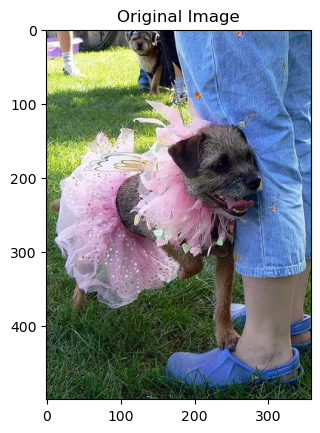

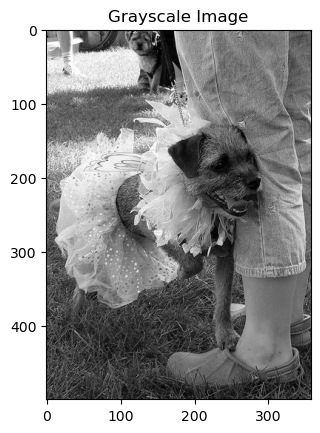

In [5]:
#Making images greyscale
from skimage import io, color, img_as_ubyte
import matplotlib.pyplot as plt
import glob

dog_images = glob.glob('../DataMining/DogImages/*/*')
annotations = glob.glob('../DataMining/Annotation/*/*')

def get_image(annot):
    img_path = '../DataMining/DogImages'
    file = annot.split('ion')
    img_filename = img_path +file[-1]+'.jpg'
    return img_filename  

dog = get_image(annotations[1])
image = io.imread(dog)

gray_image = color.rgb2gray(image)
gray_image_save = img_as_ubyte(gray_image)
io.imsave('n02093754_1100-grey.jpg', gray_image_save) 

plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()